# Hierarchical clustering

## Cargue de librerías

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, linkage




## Dataset

In [140]:
data = {
    'Nombre': ['Pedro', 'Salomón', 'Jacobo', 'Jerónimo', 'Vicente'],
    'Matemáticas': [3, 4, 6, 8, 8],
    'Programación': [8, 5, 10, 4, 6]
}

data= pd.DataFrame(data)

# Display the DataFrame
print(data)

     Nombre  Matemáticas  Programación
0     Pedro            3             8
1   Salomón            4             5
2    Jacobo            6            10
3  Jerónimo            8             4
4   Vicente            8             6


In [141]:
Nombres= pd.array(data['Nombre'])

Text(0.5, 1.0, 'Diagrama de dispersión con las notas de los estudiantes')

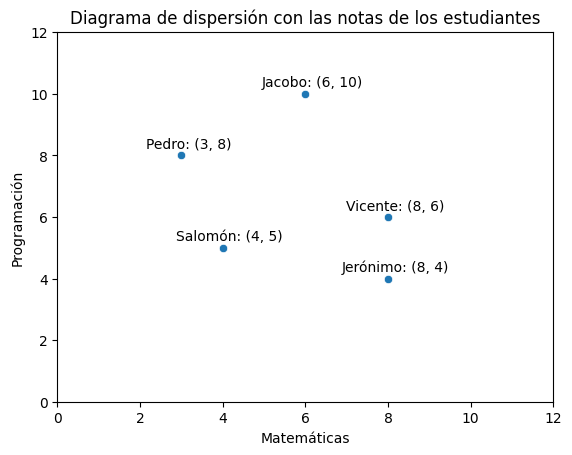

In [142]:


sns.scatterplot(data=data, x='Matemáticas', y='Programación')

for i in range(len(data['Matemáticas'])):
    plt.annotate(f"{data['Nombre'][i]}: ({data['Matemáticas'][i]}, {data['Programación'][i]})",
                 (data['Matemáticas'][i], data['Programación'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.title('Diagrama de dispersión con las notas de los estudiantes')


Se calcula la matriz de distancias (euclidiana) entre todos los puntos

In [143]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

data2= data.iloc[:,1:3]
data2 = np.array(data2)


distance_matrix = squareform(pdist(data2, metric='euclidean'))

print("Matriz de distancias (Euclideana):")
print(distance_matrix)

Matriz de distancias (Euclideana):
[[0.         3.16227766 3.60555128 6.40312424 5.38516481]
 [3.16227766 0.         5.38516481 4.12310563 4.12310563]
 [3.60555128 5.38516481 0.         6.32455532 4.47213595]
 [6.40312424 4.12310563 6.32455532 0.         2.        ]
 [5.38516481 4.12310563 4.47213595 2.         0.        ]]


Ahora calculamos cual es el valor mínimo de la matriz de distancias y su posición, para saber cuales son los 2 puntos que formarán el primer cluster.

In [144]:
min_value = np.inf
min_row = None
min_col = None

for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        if i != j:
            if distance_matrix[i, j] < min_value:
                min_value = distance_matrix[i, j]
                min_row = i
                min_col = j

print("El valor mínimo de la matriz de distancias (excluyendo la diagonal) es:", min_value)
print("La posición del valor mínimo (fila, columna) es:", min_row, min_col)
print("Estos 2 puntos (Jerónimo, Vicente) conformarán el primer cluster")

El valor mínimo de la matriz de distancias (excluyendo la diagonal) es: 2.0
La posición del valor mínimo (fila, columna) es: 3 4
Estos 2 puntos (Jerónimo, Vicente) conformarán el primer cluster


# Hierarchical clustering usando `Python`

## Preparación de datos y clusterización

In [145]:
x= data2[:,0]
y= data2[:,1]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualización de los clústers en el diagrama de dispersión

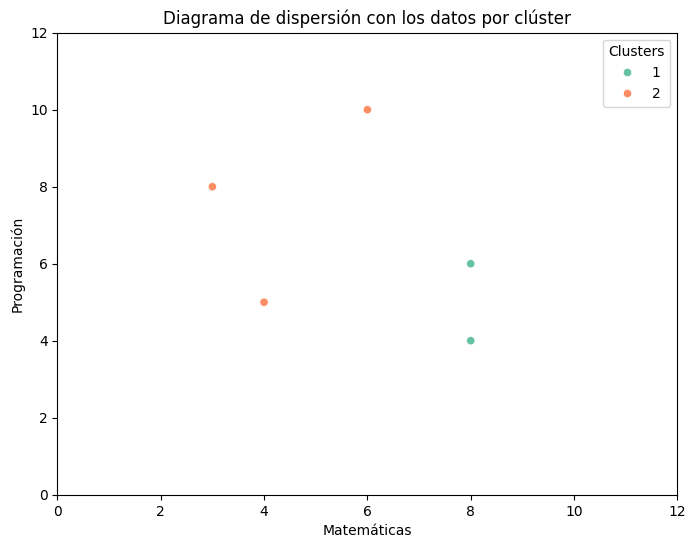

In [146]:
Z = linkage(X, method='single')
k = 2
clusters = fcluster(Z, k, criterion='maxclust')

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='Set2', legend='full')
plt.title('Diagrama de dispersión con los datos por clúster')
plt.xlabel('Matemáticas')
plt.ylabel('Programación')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.legend(title='Clusters')
plt.show()

## Dendograma

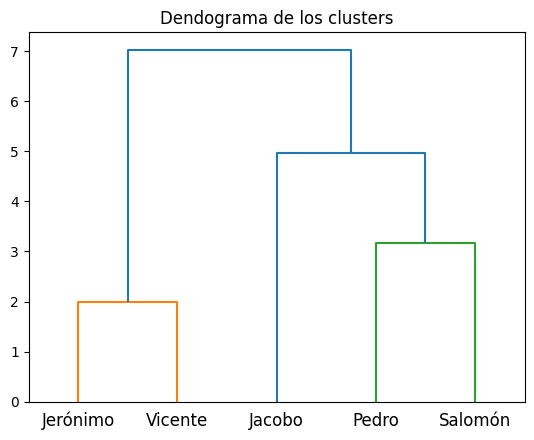

In [147]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data, labels= Nombres)
plt.title('Dendograma de los clusters')
plt.show()